## Imports

In [18]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px

# Display training and test splits

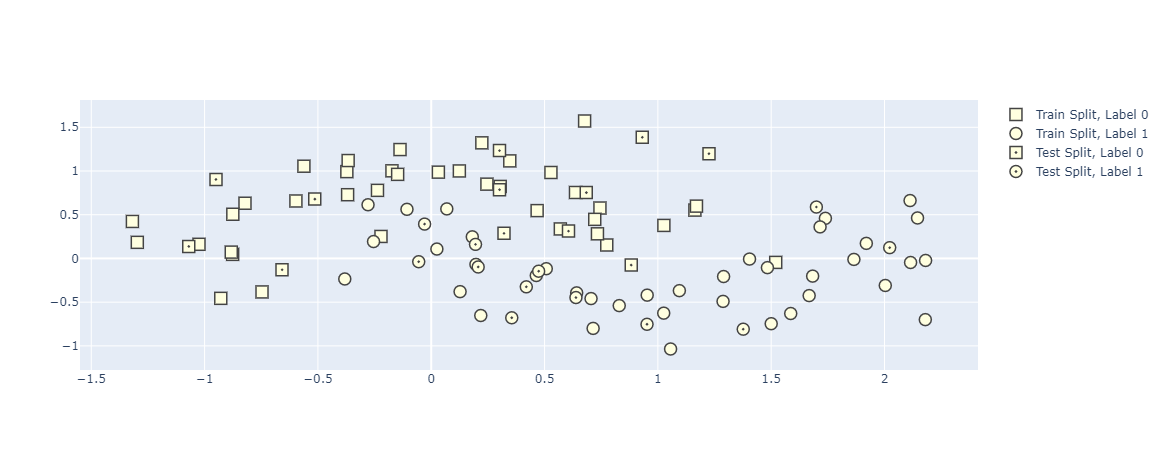

In [6]:
# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)
fig.show()

## Visualize predictions on test split with plotly.express

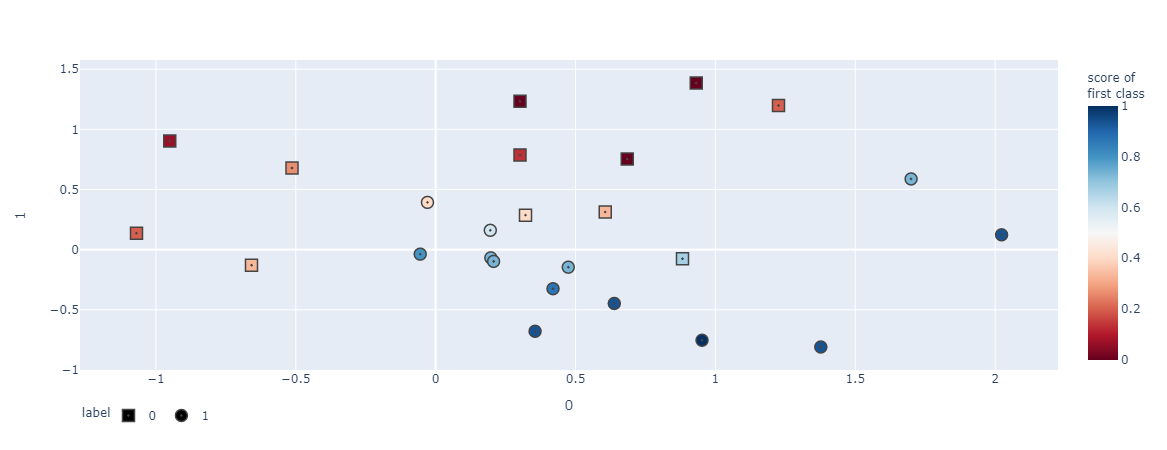

In [19]:
# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Fit the model on training data, predict on test data
clf = KNeighborsClassifier(15)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'score of <br>first class'}
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

## Probability Estimates with go.Contour

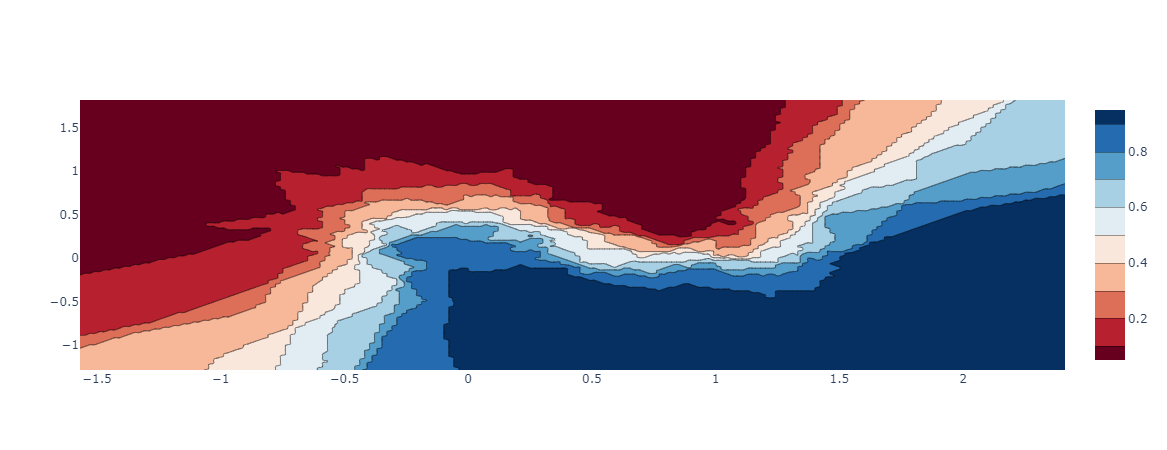

In [20]:
mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale='RdBu'
    )
])
fig.show()

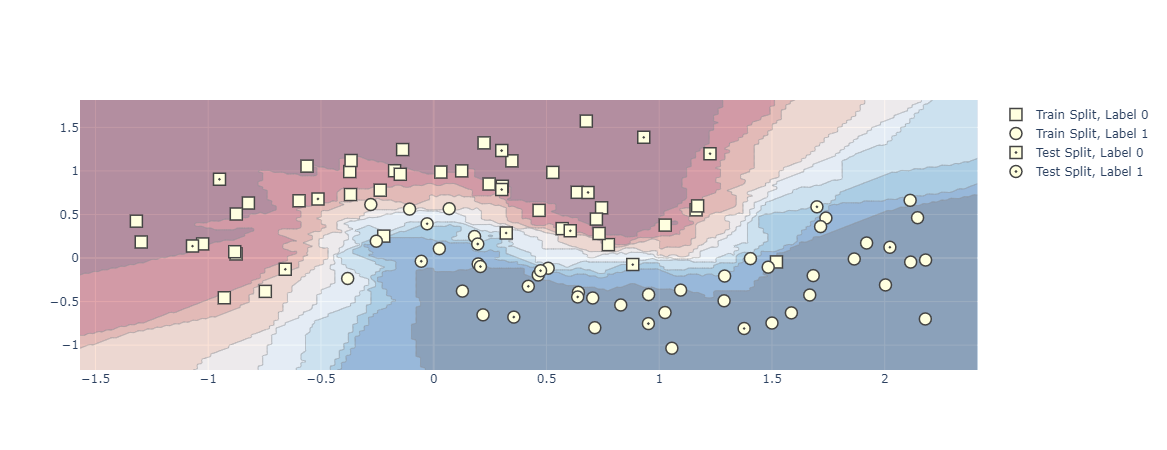

In [21]:
mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)

fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=False,
        colorscale='RdBu',
        opacity=0.4,
        name='Score',
        hoverinfo='skip'
    )
)
fig.show()

## k-NN classification in Dash

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id="graph"),
    html.P("Number of neighbors:"),
    dcc.Slider(
        id='slider-neighbors',
        min=5, max=20, step=1, value=12,
        marks={i: str(i) for i in range(5,21,5)})
])

@app.callback(
    Output("graph", "figure"), 
    [Input("slider-neighbors", "value")])
def train_and_display_model(k):
    # Load and split data
    X, y = make_moons(noise=0.3, random_state=0)
    xrange, yrange = build_range(X, y)
    xx, yy = np.meshgrid(xrange, yrange)
    test_input = np.c_[xx.ravel(), yy.ravel()]

    # Create classifier, run predictions on grid
    clf = KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)
    Z = clf.predict_proba(test_input)[:, 1]
    Z = Z.reshape(xx.shape)
    fig = build_figure(X, y, Z, xrange, yrange)

    return fig

# ############ HELPER FUNCTIONS ############
def build_range(X, y, mesh_size=.02, margin=.25):
    x_min = X[:, 0].min() - margin
    x_max = X[:, 0].max() + margin
    y_min = X[:, 1].min() - margin
    y_max = X[:, 1].max() + margin

    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    return xrange, yrange

def build_figure(X, y, Z, xrange, yrange):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y.astype(str), test_size=0.25, random_state=0)

    trace_specs = [
        [X_train, y_train, '0', 'Train', 'square'],
        [X_train, y_train, '1', 'Train', 'circle'],
        [X_test, y_test, '0', 'Test', 'square-dot'],
        [X_test, y_test, '1', 'Test', 'circle-dot']
    ]

    fig = go.Figure(data=[
        go.Scatter(
            x=X[y==label, 0], y=X[y==label, 1],
            name=f'{split}, y={label}',
            mode='markers', marker_symbol=marker
        )
        for X, y, label, split, marker in trace_specs
    ])
    fig.update_traces(
        marker_size=12, marker_line_width=1.5,
        marker_color="lightyellow"
    )

    fig.add_trace(
        go.Contour(
            x=xrange, y=yrange, z=Z,
            showscale=False, colorscale='RdBu',
            opacity=0.4, name='Score', hoverinfo='skip'
        )
    )

    return fig

app.run_server(debug=True)